In [1]:
from PIL import Image
import numpy as np

data=np.load("data/conic/train/0_inst.npy")

len(np.unique(data))-1


145

In [5]:
import torch
import torchvision
# 检测CUDA版本
if torch.cuda.is_available():
    print("CUDA版本:", torch.version.cuda)
else:
    print("未检测到可用的CUDA设备。")

# 检测PyTorch版本
print("PyTorch版本:", torch.__version__)

# 检测torchvision的版本
print("torchvision版本:", torchvision.__version__)



CUDA版本: 11.1
PyTorch版本: 1.9.0+cu111
torchvision版本: 0.10.0+cu111


In [6]:
from scipy.io import loadmat
mat = loadmat("data/cpm17/CPM17/train/Labels/image_00.mat")
print(mat.keys())
print(mat['inst_map'])

dict_keys(['__header__', '__version__', '__globals__', 'inst_map'])
[[0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [2]:
import os.path as osp
with open("data/monuseg/only-train_t12_v4_train_w512_s256.txt", 'r') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        img_path = osp.join("data/monuseg", line)
        # print(img_path)



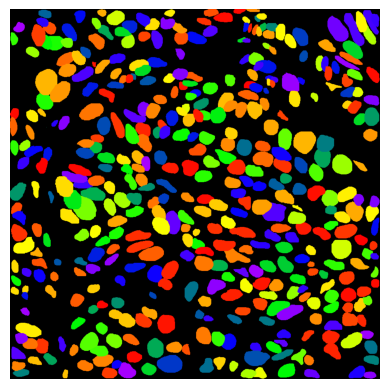

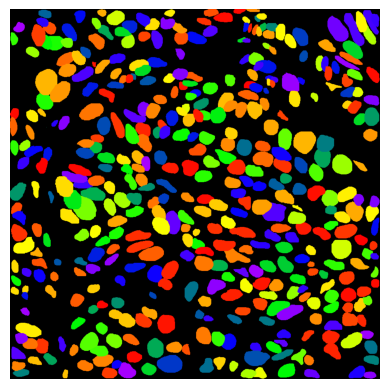

In [3]:

import matplotlib
# matplotlib.use('tkagg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import numpy as np

# 将sem_logit[0]从GPU移动到CPU并移除梯度信息
img = img[0].cpu().detach().numpy()

# 归一化图像
img = (img - np.min(img)) / (np.max(img) - np.min(img))

# 显示图像
plt.imshow(img.transpose(1, 2, 0))
plt.axis('off')
plt.savefig("img.png") 





In [4]:
import numpy as np

def get_bounding_box(img):
    """Get bounding box coordinate information."""
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    rmax += 1
    cmax += 1
    return [cmin, rmin, cmax, rmax]  # 返回 [tl_x, tl_y, br_x, br_y] 格式

def get_bboxes(inst_gt):
    inst_ids = np.unique(inst_gt)
    bboxes = []

    for inst_id in inst_ids:
        if inst_id == 0:  # 跳过背景
            continue
        inst_map = inst_gt == inst_id
        inst_box = get_bounding_box(inst_map)
        bboxes.append(inst_box)

    return np.array(bboxes)  # 将列表转换为 numpy 数组

# 示例使用
inst_gt =np.load("data/monuseg/train/w512_s256/TCGA-18-5592-01Z-00-DX1_0_inst.npy")
gt_bboxes = get_bboxes(inst_gt)
gt_labels= np.zeros(gt_bboxes.shape[0], dtype=np.int64)
print(gt_bboxes)


[[  8  22 249 235]
 [  0   0 257 262]
 [257   0 300 264]
 [289 257 335 317]
 [  0 273 275 325]
 [  0 325 288 371]
 [274 279 314 350]
 [310 325 354 370]
 [346  45 389 212]
 [405  42 451 215]
 [381 260 437 347]
 [355 307 393 361]
 [383 340 435 394]
 [346 353 393 407]
 [309 380 364 423]
 [259 399 318 449]
 [  0 395 267 451]
 [ 77 423 180 460]
 [ 35 405 222 460]
 [ 60 287 197 353]
 [ 74  11 183 246]
 [ 76  63 181 194]
 [270  57 320 200]
 [390   0 472 280]
 [503 277 512 332]
 [510  33 512 224]
 [478   0 512 261]
 [433 334 488 402]
 [491 350 512 401]
 [388 421 415 467]
 [414 412 444 461]
 [  0 445 289 493]
 [291 444 333 477]
 [294 481 319 512]
 [  0 500 273 512]
 [311 467 343 501]
 [323 490 373 512]
 [392 462 428 506]
 [488 447 512 480]
 [415 511 434 512]
 [454 472 490 509]
 [425 482 461 512]
 [496 478 512 506]
 [477 498 512 512]
 [ 76   0 181 293]
 [ 23 451 234 498]
 [ 46 463 211 512]
 [330 260 356 297]
 [301   5 342 252]
 [345 270 373 303]
 [ 87 486 170 512]
 [  6 495 251 512]
 [458 285 50

In [ ]:
import matplotlib
# matplotlib.use('tkagg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

image_np = label['inst_color_gt'][0, :, :, :].cpu().numpy()
plt.savefig("image_np1.png") 
plt.show()

image_np = data['img'][0, :, :, :].cpu().numpy()
image_np = np.transpose(image_np, (1, 2, 0))
plt.savefig("image_np2.png") 
plt.show()

matplotlib.image.imsave("a.jpg", image_np)
green = (0, 255, 0)
image = Image.open('a.jpg')
draw = ImageDraw.Draw(image)

for i in range(0, bboxes_gt[0].shape[0]):
    x0 = bboxes_gt[0][i, 0]
    y0 = bboxes_gt[0][i, 1]
    x1 = bboxes_gt[0][i, 2]
    y1 = bboxes_gt[0][i, 3]
    draw.line([(x0, y0), (x0, y1)], fill=green, width=3)
    draw.line([(x0, y1), (x1, y1)], fill=green, width=3)
    draw.line([(x1, y1), (x1, y0)], fill=green, width=3)
    draw.line([(x1, y0), (x0, y0)], fill=green, width=3)

plt.savefig("image.png") 
plt.show()

In [46]:

from torchvision.models.resnet import Bottleneck as ResNetBottleneck
from torchvision.models.resnet import ResNet
import torch.nn as nn
import torch.nn.functional as F

# class AttentionPool2d(nn.Module):
#     def __init__(self, spacial_dim: int, embed_dim: int, num_heads: int, output_dim: int = None):
#         super().__init__()
#         self.positional_embedding = nn.Parameter(torch.randn(spacial_dim ** 2 + 1, embed_dim) / embed_dim ** 0.5)
#         self.k_proj = nn.Linear(embed_dim, embed_dim)
#         self.q_proj = nn.Linear(embed_dim, embed_dim)
#         self.v_proj = nn.Linear(embed_dim, embed_dim)
#         self.c_proj = nn.Linear(embed_dim, output_dim or embed_dim)
#         self.num_heads = num_heads

#     def to(self, device):
#         super().to(device)
#         self.positional_embedding = self.positional_embedding.to(device)
#         self.k_proj = self.k_proj.to(device)
#         self.q_proj = self.q_proj.to(device)
#         self.v_proj = self.v_proj.to(device)
#         self.c_proj = self.c_proj.to(device)
#     def forward(self, x):
#         x = x.flatten(start_dim=2).permute(2, 0, 1)  # NCHW -> (HW)NC
#         x = torch.cat([x.mean(dim=0, keepdim=True), x], dim=0)  # (HW+1)NC
#         x = x + self.positional_embedding[:, None, :].to(x.dtype)  # (HW+1)NC
#         x, _ = F.multi_head_attention_forward(
#             query=x[:1], key=x, value=x,
#             embed_dim_to_check=x.shape[-1],
#             num_heads=self.num_heads,
#             q_proj_weight=self.q_proj.weight,
#             k_proj_weight=self.k_proj.weight,
#             v_proj_weight=self.v_proj.weight,
#             in_proj_weight=None,
#             in_proj_bias=torch.cat([self.q_proj.bias, self.k_proj.bias, self.v_proj.bias]),
#             bias_k=None,
#             bias_v=None,
#             add_zero_attn=False,
#             dropout_p=0,
#             out_proj_weight=self.c_proj.weight,
#             out_proj_bias=self.c_proj.bias,
#             use_separate_proj_weight=True,
#             training=self.training,
#             need_weights=False
#         )
#         return x.squeeze(0)

class ResNetExt(ResNet):

    def _forward_impl(self, x, freeze):
        # See note [TorchScript super()]
        if self.training:
            x = self.conv1(x)
            x = self.bn1(x)
            x = self.relu(x)
            with torch.set_grad_enabled(not freeze):
                x1 = x = self.layer1(x)
                x2 = x = self.layer2(x)
                x3 = x = self.layer3(x)
                x4 = x = self.layer4(x)
        else:
            x = self.conv1(x)
            x = self.bn1(x)
            x = self.relu(x)
            x1 = x = self.layer1(x)
            x2 = x = self.layer2(x)
            x3 = x = self.layer3(x)
            x4 = x = self.layer4(x)
            return x1, x2, x3, x4
        # x5 = self.attnpool(x4)
        return x1, x2, x3, x4

    def forward(self, x: torch.Tensor, freeze: bool = False) -> torch.Tensor:
        return self._forward_impl(x, freeze)

    @staticmethod
    def resnet50(num_input_channels, pretrained=None):
        model = ResNetExt(ResNetBottleneck, [3, 4, 6, 3])
        # model.conv1 = nn.Conv2d(num_input_channels, 64, 7, stride=1, padding=3)
        model.conv1 = nn.Conv2d(num_input_channels, 32, kernel_size=3, stride=2, padding=1, bias=False)
        model.bn1 = nn.BatchNorm2d(32)
        if pretrained is not None:
            pretrained = torch.load(pretrained)
            (missing_keys, unexpected_keys) = model.load_state_dict(pretrained, strict=False)
        return model


In [50]:
from torchvision import models
import torch
import re

# 加载 TorchScript 模型
scripted_model = torch.jit.load(r"pretrained/RN50.pt")

# 提取 state_dict
state_dict = scripted_model.state_dict()

# 要删除的键的列表
keys_to_remove = [
    "token_embedding.weight",
    "ln_final.weight",
    "ln_final.bias",
    "positional_embedding",
    "text_projection",
    "logit_scale",
    "input_resolution",
    "context_length",
    "vocab_size",
    "visual.attnpool.positional_embedding"
]

# 用于匹配通配符键的模式
pattern = re.compile(r"transformer\.resblocks.*")

# 创建一个新的 state_dict
new_state_dict = {}

for key, value in state_dict.items():
    # 检查键是否在删除列表中，或者是否匹配模式
    if key not in keys_to_remove and not pattern.match(key):
        # 重命名规则：删除前缀 "visual."
        new_key = key.replace("visual.", "")
        # 将重命名后的键值对添加到新的 state_dict
        new_state_dict[new_key] = value
# 获取自定义的 resnet50 无训练的空权重
net = ResNetExt.resnet50(3)
op = net.state_dict()

# 将 state_dict 里不属于 op 的键剔除掉
pretrained_dict = {k: v for k, v in new_state_dict.items() if k in op}


# op.update(pretrained_dict)
net.load_state_dict(pretrained_dict, strict=False)

_IncompatibleKeys(missing_keys=['fc.weight', 'fc.bias', 'attnpool.positional_embedding'], unexpected_keys=[])

In [4]:
import clip
import torch
from PIL import Image
# 检查 CUDA 是否可用，并选择设备
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# 假设您的原始图像数据在这个张量中
# image 的形状应该是 [batch_size, channels, height, width]
image = Image.open("data/monuseg/train/w512_s256/TCGA-18-5592-01Z-00-DX1_0.tif")# 示例数据

# 将图像移动到指定的 CUDA 设备
image = image.to(device)

# 加载 CLIP 模型和预处理
clip_model, clip_preprocess = clip.load("pretrained/RN50.pt", device=device)

# 使用 clip_preprocess 处理您的图像
processed_images = clip_preprocess(image)

# 对文本数据进行标记化，并移动到同一 CUDA 设备
text = clip.tokenize([str(i) for i in range(101)]).to(device)

# 使用 CLIP 模型进行前向传递
with torch.no_grad():
    logits_per_image, logits_per_text = clip_model(processed_images, text)



AttributeError: to

In [2]:
import sklearn
print(sklearn.__version__)


1.3.2
